In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

pd.set_option("display.max_rows", 101)
pd.set_option('display.max_columns',50)

In [2]:
with open('fielding_data.pkl', 'rb') as cellar:
    field_dict = pickle.load(cellar)
field_df = field_dict['LgAvg']

In [3]:
field_df = field_df.replace(to_replace='',value=np.nan)
field_df['Year']=field_df.index.astype(int)
field_df = field_df.astype(float)

In [4]:
field_df.dtypes

#Fld       float64
RA/G       float64
DefEff     float64
G          float64
GS         float64
CG         float64
Inn        float64
Ch         float64
PO         float64
A          float64
E          float64
DP         float64
Fld%       float64
Rtot       float64
Rtot/yr    float64
Year       float64
dtype: object

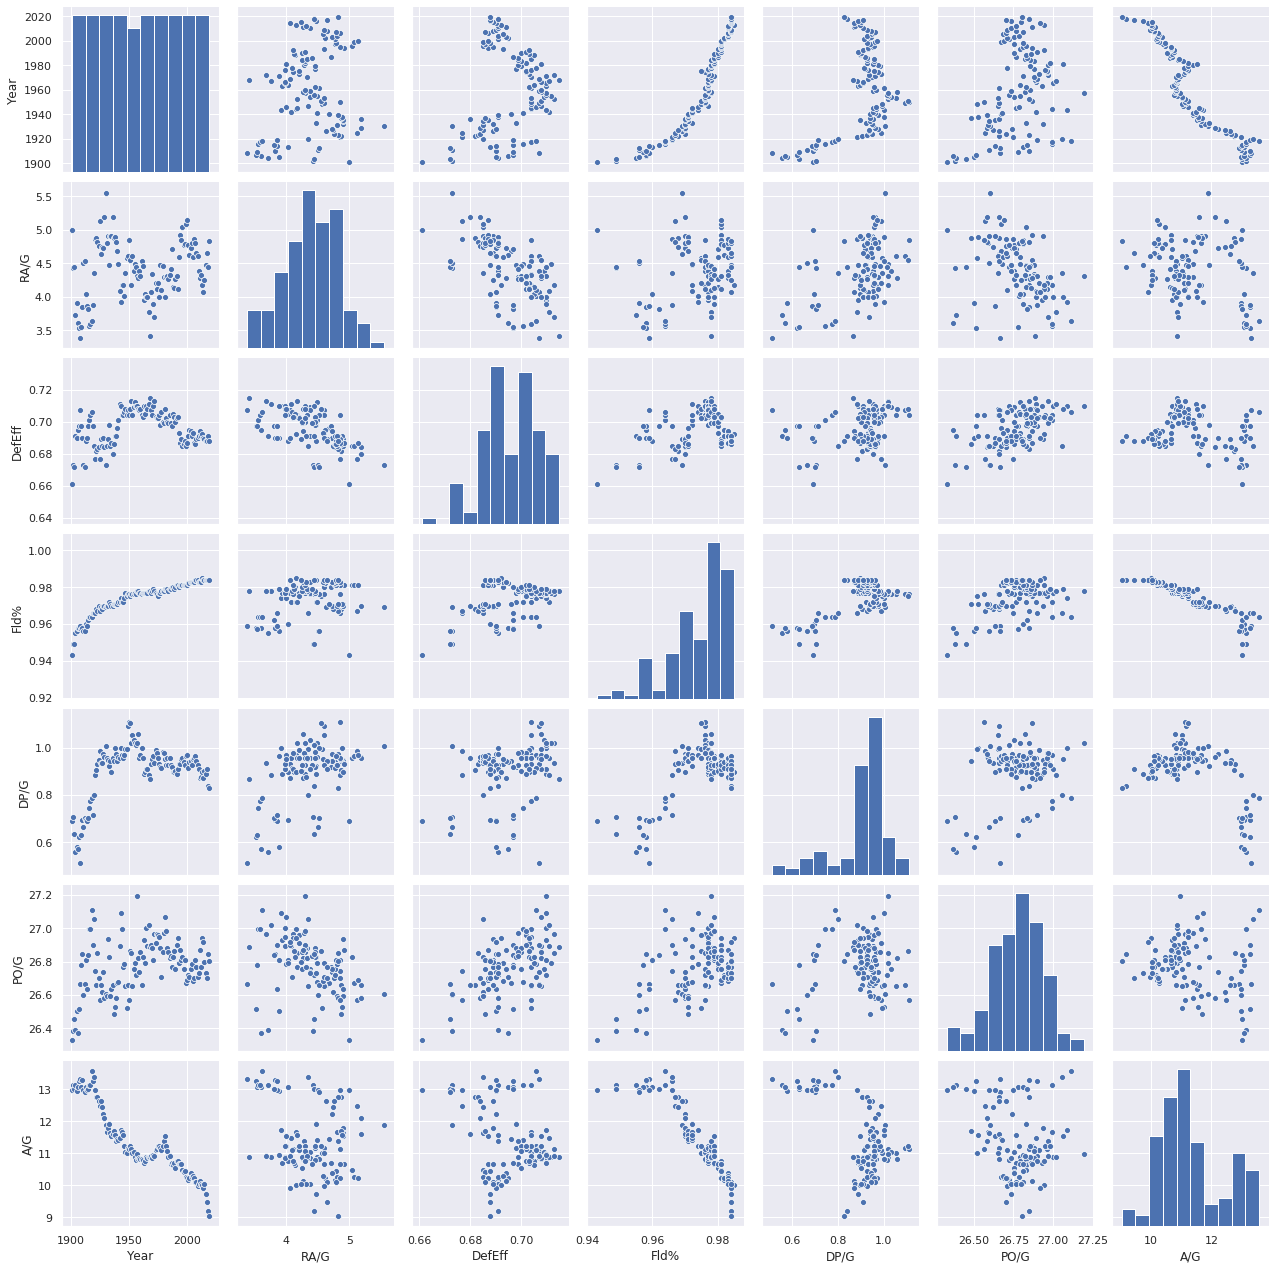

In [8]:
f_r_df = pd.concat([field_df['Year'],field_df['RA/G'],field_df['DefEff']
                   ,field_df['Fld%']],axis=1)
f_r_df['DP/G'] = field_df['DP']/field_df['G']
f_r_df['PO/G'] = field_df['PO']/field_df['G']
f_r_df['A/G'] = field_df['A']/field_df['G']
sns.pairplot(f_r_df)

Fielding percentage is so worrisome, because it's basically about how many plays are scored as errors.

I guess I trust defensive efficiency more, although it seems to be considerably more of a bit of brain surgery to calculate than seems necessary when I look at the bb-ref hover text.

Double plays per game is another intriguing stat. The attractive thing about it is that there is no judgment call involved. The same should, to my knowledge, be true of putouts and assists as well. Odd that putouts is a Rorschach blot but assists is another absurdly tight trendline.

I can't really decide... I think DefEff, DP/G, A/G all bring intriguing things to the table.

To give the devil his due, telling scorers to score more or less errors is another intervention that MLB could make.

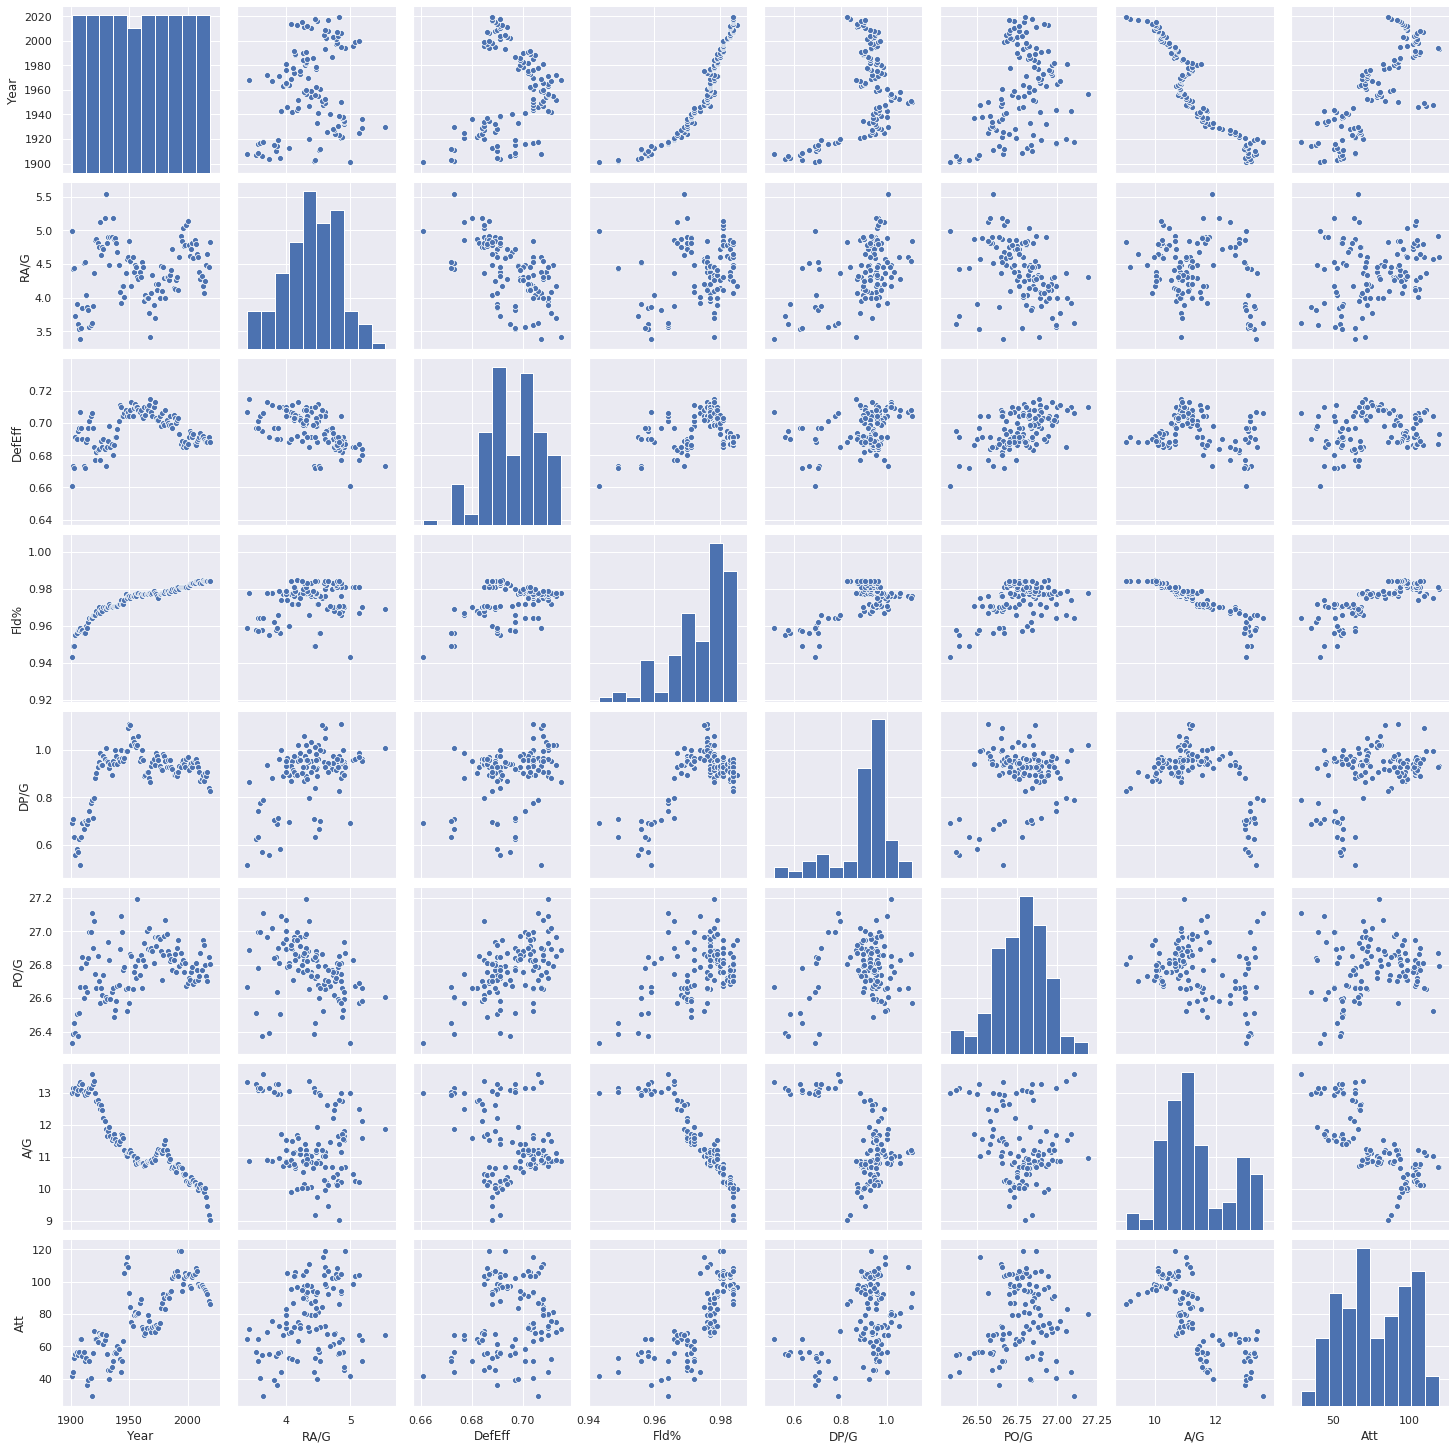

In [9]:
with open('bb-int.pkl','rb') as cellar:
    att_df = pickle.load(cellar)
f_r_df['Att']=att_df['NormAtt/G'] * 1000000
sns.pairplot(f_r_df)

In [10]:
with open('field_rate_data.pkl', 'wb') as cellar:
    pickle.dump(f_r_df, cellar)